<a href="https://colab.research.google.com/github/vanditaagarwal/Image_Search_Engine_Visual_BOW/blob/main/CV_Assignment3_Question2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries

from keras.datasets import cifar10
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


In [ ]:
# Loading the CIFAR-10 dataset with train and test images

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
'''
train8 = []
for image in train_images:
  image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
  #train8.append(image8bit)
'''

"\ntrain8 = []\nfor image in train_images:\n  image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')\n  #train8.append(image8bit)\n"

In [ ]:
# Initializing the SIFT descriptor extractor
sift = cv2.xfeatures2d.SIFT_create()

# Extracting SIFT descriptors from the training CIFAR10 images
desc = []
for image in train_images:
    #print(type(image))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    keyp, descriptor = sift.detectAndCompute(gray, None)
    desc.append(descriptor)
print(len(desc))
# Removing zero-dimensional arrays present in descriptors
desc_list = [arr for arr in desc if arr is not None]

#print(np.where(descriptors == 0))

desc = np.concatenate(desc_list, axis=0)


50000


In [ ]:
# Defining Kmeans model and fitting descriptors in that and defining number of clusters for that as 30

from sklearn.cluster import KMeans

# Cluster the feature descriptors using K-Means
kmeans = KMeans(n_clusters=30, random_state=0)
kmeans.fit(desc)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=30, random_state=0)

In [ ]:
# Building the visual vocabulary
vocabulary = kmeans.cluster_centers_

In [ ]:
train8 = []
for image in train_images:
  image8bit = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
  train8.append(image8bit)

In [ ]:
# Extracting feature vectors from the training CIFAR10 images
feature_vectors = []
for image in train_images:
    keyps, descs = sift.detectAndCompute(image, None)
    histogram = np.zeros(len(vocabulary))
    if descs is not None:
      for d in descs:
        # calculating diatance using norm distance
        dist = np.linalg.norm(vocabulary - d, axis=1)
        # finding nearesst cluster using distance
        nearest_cluster = np.argmin(dist)
        # building histogram using that
        histogram[nearest_cluster] += 1
      feature_vectors.append(histogram)

feature_vectors = np.array(feature_vectors)


In [ ]:
# Defining a function to compute the Euclidean distance between two feature vectors
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

# Define a function to retrieve the top-5 similar images
def retrieve_similar_images(query_image):
    # Extract feature vector from the query image
    keypoints, descriptor = sift.detectAndCompute(query_image, None)
    histogram = np.zeros(len(vocabulary))
    if descriptor is not None:
      for d in descriptor:
        distances = np.linalg.norm(vocabulary - d, axis=1)
        nearest_cluster = np.argmin(distances)
        histogram[nearest_cluster] += 1

    # Compute the Euclidean distances between the query feature vector and the feature vectors of all training images
    distances = []
    for feature_vector in feature_vectors:
        distance = euclidean_distance(histogram, feature_vector)
        distances.append(distance)

    # Retrieve the indices of the top-5 similar images
    indices = np.argsort(distances)[:5]

    # Return the top-5 similar images
    return train_images[indices]


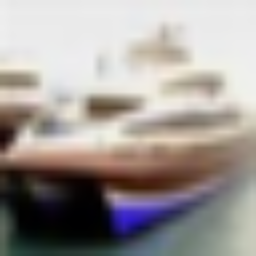

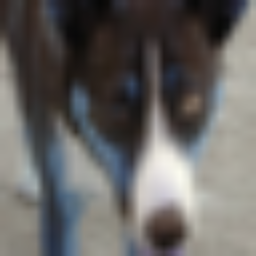

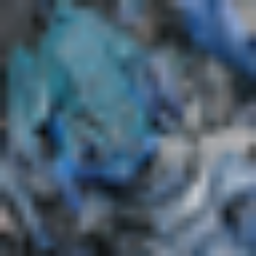

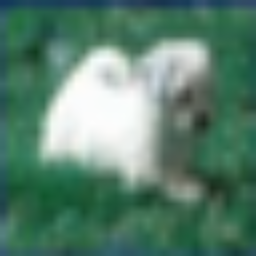

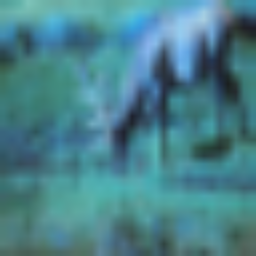

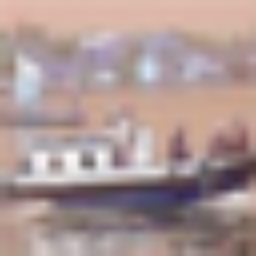

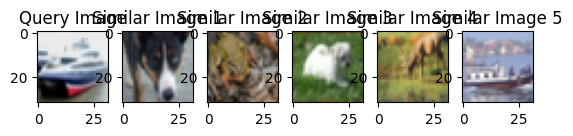

In [ ]:
# Loading a query image to check 5 most similar images
query_image = test_images[1]

# Retrieve the top-5 similar images
similar_images = retrieve_similar_images(query_image)

cv2_imshow(cv2.resize(query_image,(256,256)))
for i in range(5):
  cv2_imshow(cv2.resize(similar_images[i],(256,256)))


# Display the query image and the top-5 similar images
fig, axes = plt.subplots(1, 6)
axes[0].imshow(query_image.squeeze(), cmap='gray')
axes[0].set_title('Query Image')
for i in range(5):
    axes[i+1].imshow(similar_images[i].squeeze(), cmap='gray')
    axes[i+1].set_title(f'Similar Image {i+1}')
plt.show()


In [ ]:
'''
# Extracting feature vectors from the test CIFAR10 images
testfeature_vectors = []
for image in test_images:
    keyps, descs = sift.detectAndCompute(image, None)
    histogram = np.zeros(len(vocabulary))
    if descs is not None:
      for d in descs:
        # calculating diatance using norm distance
        dist = np.linalg.norm(vocabulary - d, axis=1)
        # finding nearesst cluster using distance
        nearest_cluster = np.argmin(dist)
        # building histogram using that
        histogram[nearest_cluster] += 1
      testfeature_vectors.append(histogram)

testfeature_vectors = np.array(testfeature_vectors)

'''

In [ ]:
# Define a function to retrieve the top-5 similar images
def retrieve_test_images(query_image):
    # Extract feature vector from the query image
    #query_feature_vector = []
    keypoints, descriptor = sift.detectAndCompute(query_image, None)
    histogram = np.zeros(len(vocabulary))
    if descriptor is not None:
      for d in descriptor:
        distances = np.linalg.norm(vocabulary - d, axis=1)
        nearest_cluster = np.argmin(distances)
        histogram[nearest_cluster] += 1
      #query_feature_vector = histogram

    # Compute the Euclidean distances between the query feature vector and the feature vectors of all training images
    distances = []
    for feature_vector in feature_vectors:
        distance = euclidean_distance(histogram, feature_vector)
        distances.append(distance)

    # Retrieve the indices of the top-5 similar images
    indices = np.argsort(distances)[:5]

    # Return indices
    return indices

In [ ]:
'''
# Compute the Euclidean distances between the feature vectors of all test images and all training images
distances = []
for feature_vector in testfeature_vectors:
    distance = np.linalg.norm(feature_vectors - feature_vector, axis=1)
    distances.append(distance)
distances = np.array(distances)

'''

# Select the training images that are closest to each test image as the ground truth set
ground_truth_sets = []
for i in test_images:
    indices = retrieve_test_images(i)
    ground_truth_sets.append(indices)


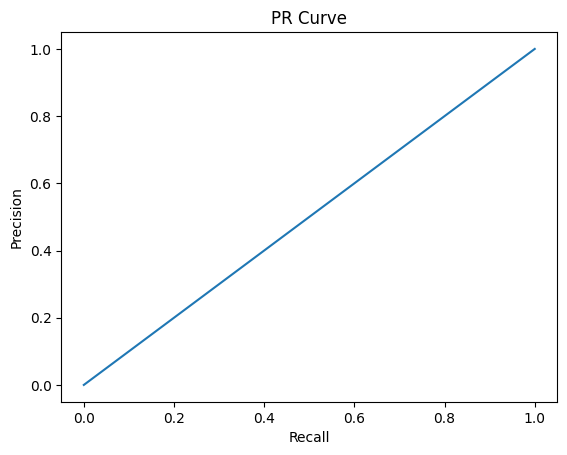

In [ ]:
# Compute the Precision, Recall, and AP for test images
precisions = []
recalls = []
aps = []
for i in range(len(test_images)):
    # Retrieve the top-5 similar images
    similar_images = retrieve_similar_images(test_images[i])

    # true positives and false positives
    true_positives = len(set(ground_truth_sets[i]).intersection(set(indices)))
    false_positives = len(indices) - true_positives

    # Precision and Recall
    precision = true_positives / len(indices)
    recall = true_positives / len(ground_truth_sets[i])

    for j in range(1, len(indices)):
        precisions.append(precision)
        recalls.append(recall)

    '''
    # Compute the AP using the trapezoidal rule
    ap = 0
    if indices[j] in ground_truth_sets[i]:
            ap += (recall - recalls[-1]) * precisions[-1] + (recall - recalls[j]) * precision / 2
        else:
            ap += (recall - recalls[-1]) * precisions[-1]
    aps.append(ap)
    '''

# checking whether division by zero is there or not
if len(precisions)!=0 & len(recalls)!=0:
   # Compute the overall Precision, Recall, and AP
   precision = sum(precisions) / len(precisions)
   recall = sum(recalls) / len(recalls)
   #ap = sum(aps) / len(aps)

   print(f'Precision: {precision:.4f}')
   print(f'Recall: {recall:.4f}')
   #print(f'AP: {ap:.4f}')

# Plot the PR curve
plt.plot(recalls, precisions)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'PR Curve')
plt.show()


